<a href="https://colab.research.google.com/github/RizqRihaz13/MachineLearningTasks/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Selamat Datang di Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Baru&#41; Coba Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Jika Anda sudah terbiasa dengan Colab, tonton video ini untuk mempelajari tabel interaktif, tampilan histori kode yang dieksekusi, dan palet perintah.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  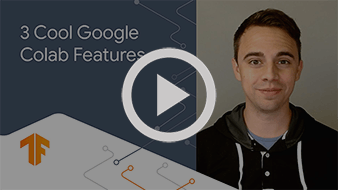
  </a>
</center>

Decision Tree Metrics:
Accuracy: 0.7
Precision: 0.49122807017543857
Recall: 0.4745762711864407
F1 Score: 0.4827586206896552
ROC AUC Score: 0.6344512561605963

k-NN Metrics:
Accuracy: 0.765
Precision: 0.6666666666666666
Recall: 0.4067796610169492
F1 Score: 0.5052631578947369
ROC AUC Score: 0.6608366390191128

Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.79      0.79       141
           2       0.49      0.47      0.48        59

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.70      0.70      0.70       200


k-NN Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.91      0.85       141
           2       0.67      0.41      0.51        59

    accuracy                           0.77       200
   macro avg       0.73      0.66      0.68       200
weighted avg       0.75  

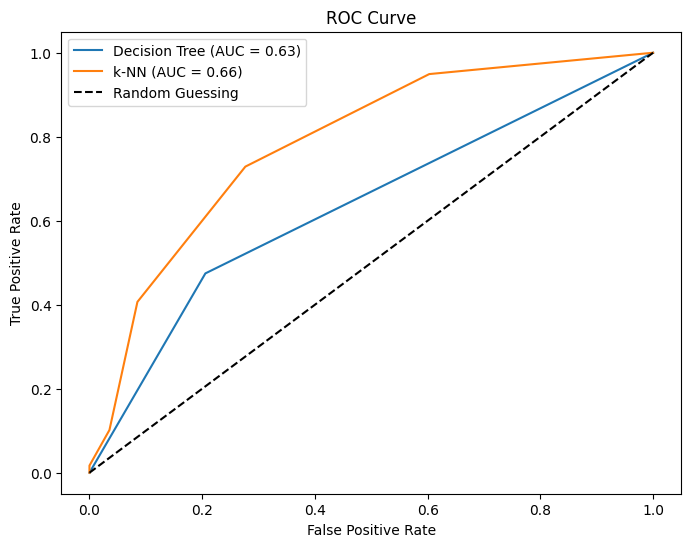

In [7]:
# Import libraries yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Membaca dataset
file_path = 'CreditDataset.csv'
data = pd.read_csv(file_path)

# Memisahkan fitur dan target dari dataset
X = data.drop('Class', axis=1)  # Menghapus kolom target
y = data['Class']  # Menggunakan kolom 'Class' sebagai target

# Mengidentifikasi kolom numerik dan kategorikal
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Membuat preprocessing pipeline untuk mengonversi data kategorikal dan menstandarisasi data numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Membagi data menjadi data latih dan data uji (80% untuk latih, 20% untuk uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Decision Tree dengan pipeline preprocessing
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_pipeline.fit(X_train, y_train)

y_pred_dt = dt_pipeline.predict(X_test)

# Evaluasi Decision Tree
print("Decision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, pos_label=2))
print("Recall:", recall_score(y_test, y_pred_dt, pos_label=2))
print("F1 Score:", f1_score(y_test, y_pred_dt, pos_label=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))

# Model 2: k-NN dengan pipeline preprocessing
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)

# Evaluasi k-NN
print("\nk-NN Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, pos_label=2))
print("Recall:", recall_score(y_test, y_pred_knn, pos_label=2))
print("F1 Score:", f1_score(y_test, y_pred_knn, pos_label=2))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_knn))

# Menghasilkan laporan klasifikasi lengkap (Precision, Recall, F1-Score, dll.)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nk-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Plot ROC Curve untuk Decision Tree dan k-NN
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pipeline.predict_proba(X_test)[:, 1], pos_label=2)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_pipeline.predict_proba(X_test)[:, 1], pos_label=2)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_dt)))
plt.plot(fpr_knn, tpr_knn, label='k-NN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_knn)))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Insight :
Berdasarkan grafik ROC, model k-NN menunjukkan performa yang sedikit lebih baik dibandingkan model Decision Tree dalam mengklasifikasikan data. Hal ini terlihat dari nilai AUC (Area Under the Curve) yang lebih tinggi pada model k-NN. Kedua model masih memiliki kelemahan signifikan dalam menangani kelas minoritas, seperti terlihat dari rendahnya recall dan F1-Score. Selain itu, ketidakseimbangan kelas antara kelas 1 dan kelas 2 berkontribusi terhadap performa model yang kurang optimal.

<div class="markdown-google-sans">
  <h2>Apa itu Colab?</h2>
</div>

Colab, atau "Colaboratory", memungkinkan Anda menulis dan mengeksekusi Python di browser, dengan
- Tidak memerlukan konfigurasi
- Akses tanpa biaya ke GPU
- Berbagi dengan mudah

Apakah Anda seorang <strong>pelajar</strong>, <strong>data scientist</strong>, atau <strong>peneliti AI</strong>, Colab dapat memudahkan pekerjaan Anda. Tonton <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Pengantar Colab</a> untuk mempelajari lebih lanjut, atau langsung mulai di bawah ini.

In [8]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Muat dataset
data = pd.read_csv('MaterialStrength.csv')

# 2. Encode kolom kategori ('x14', 'x15') menggunakan Label Encoding
label_encoder_x14 = LabelEncoder()
label_encoder_x15 = LabelEncoder()
data['x14_encoded'] = label_encoder_x14.fit_transform(data['x14'].astype(str))
data['x15_encoded'] = label_encoder_x15.fit_transform(data['x15'].astype(str))

# 3. Hapus kolom kategori asli karena sudah dikodekan
data_processed = data.drop(columns=['x14', 'x15'])

# 4. Pisahkan fitur (X) dan target (y)
X = data_processed.drop(columns=['target_feature'])
y = data_processed['target_feature']

# 5. Bagi data menjadi set pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Decision Tree Regressor
# Inisialisasi model Decision Tree
dt_regressor = DecisionTreeRegressor(random_state=42)
# Latih model
dt_regressor.fit(X_train, y_train)
# Prediksi pada data pengujian
y_pred_dt = dt_regressor.predict(X_test)
# Hitung metrik evaluasi untuk Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Cetak hasil untuk Decision Tree
print("Hasil Regresi Decision Tree:")
print(f"MSE: {mse_dt}, RMSE: {rmse_dt}, MAE: {mae_dt}, R²: {r2_dt}")

# 7. k-NN Regressor
# Inisialisasi model k-NN
knn_regressor = KNeighborsRegressor()
# Latih model
knn_regressor.fit(X_train, y_train)
# Prediksi pada data pengujian
y_pred_knn = knn_regressor.predict(X_test)
# Hitung metrik evaluasi untuk k-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Cetak hasil untuk k-NN
print("\nHasil Regresi k-NN:")
print(f"MSE: {mse_knn}, RMSE: {rmse_knn}, MAE: {mae_knn}, R²: {r2_knn}")

# 8. Regresi Linear
# Inisialisasi model Regresi Linear
lr_regressor = LinearRegression()
# Latih model
lr_regressor.fit(X_train, y_train)
# Prediksi pada data pengujian
y_pred_lr = lr_regressor.predict(X_test)
# Hitung metrik evaluasi untuk Regresi Linear
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Cetak hasil untuk Regresi Linear
print("\nHasil Regresi Linear:")
print(f"MSE: {mse_lr}, RMSE: {rmse_lr}, MAE: {mae_lr}, R²: {r2_lr}")

# 9. Regresi Linear dengan basis fungsi (polinomial)
# Terapkan fitur polinomial derajat 2
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Latih model Regresi Linear pada fitur polinomial
lr_poly_regressor = LinearRegression()
lr_poly_regressor.fit(X_poly_train, y_train)
# Prediksi pada data pengujian
y_pred_poly = lr_poly_regressor.predict(X_poly_test)
# Hitung metrik evaluasi untuk Regresi Polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Cetak hasil untuk Regresi Polinomial
print("\nHasil Regresi Linear dengan Polinomial:")
print(f"MSE: {mse_poly}, RMSE: {rmse_poly}, MAE: {mae_poly}, R²: {r2_poly}")


Hasil Regresi Decision Tree:
MSE: 20.954405339805824, RMSE: 4.577598206462186, MAE: 2.3470388349514564, R²: 0.9186795331743481

Hasil Regresi k-NN:
MSE: 72.70981852427184, RMSE: 8.52700524945727, MAE: 6.671669902912622, R²: 0.717825617605572

Hasil Regresi Linear:
MSE: 75.4674986230397, RMSE: 8.687203153089014, MAE: 6.919559075838647, R²: 0.7071235323232181

Hasil Regresi Linear dengan Polinomial:
MSE: 34.68604618016109, RMSE: 5.889486070970972, MAE: 4.662042987883282, R²: 0.8653893812797192


Insight :
Decision Tree adalah model terbaik dengan R² 0.92 dan kesalahan prediksi paling rendah (RMSE 4.58), menunjukkan akurasi tinggi. Polynomial Regression juga kompetitif (R² 0.87) dan lebih baik dalam menangkap hubungan non-linear dibanding Regresi Linear biasa dan k-NN, yang memiliki performa lebih rendah (R² 0.71-0.72) dan kesalahan prediksi lebih besar. Secara keseluruhan, Decision Tree paling cocok untuk data ini.

<div class="markdown-google-sans">

## <strong>Memulai</strong>
</div>

Dokumen yang sedang Anda baca bukan halaman statis. Ini media interaktif bernama <strong>notebook Colab</strong> yang memungkinkan Anda menulis dan mengeksekusi kode.

Misalnya, berikut ini <strong>kode sel</strong> dengan skrip Python pendek yang mengomputasi sebuah nilai, menyimpannya dalam suatu variabel, dan mencetak hasilnya:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Untuk mengeksekusi kode dalam sel di atas, pilih kode tersebut dengan mengkliknya, kemudian tekan tombol putar di sebelah kiri kode atau gunakan pintasan keyboard "Command/Ctrl+Enter". Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

Variabel yang Anda tentukan dalam sebuah sel nantinya dapat digunakan di sel lain:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Notebook Colab memungkinkan Anda menggabungkan <strong>kode yang dapat dijalankan</strong> dan <strong>rich text</strong> dalam satu dokumen, beserta <strong>gambar</strong>, <strong>HTML</strong>, <strong>LaTeX</strong>, dan lainnya. Saat Anda membuat notebook Colab Anda sendiri, notebook tersebut akan disimpan di akun Google Drive Anda. Anda dapat dengan mudah membagikan notebook Colab Anda dengan rekan kerja atau teman, sehingga memungkinkan mereka memberikan komentar di notebook Anda atau bahkan mengeditnya. Untuk mempelajari lebih lanjut, buka <a href="/notebooks/basic_features_overview.ipynb">Ringkasan Colab</a>. Untuk membuat notebook Colab baru, Anda dapat menggunakan menu File di atas, atau menggunakan link berikut: <a href="http://colab.research.google.com#create=true">buat notebook Colab baru</a>.

Notebook Colab adalah notebook Jupyter yang dihosting oleh Colab. Untuk mempelajari project Jupyter lebih lanjut, buka <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Ilmu data
</div>

Dengan Colab, Anda dapat memanfaatkan kecanggihan library Python yang populer untuk menganalisis dan memvisualisasikan data. Sel kode di bawah menggunakan <strong>numpy</strong> untuk menghasilkan beberapa data acak, dan menggunakan <strong>matplotlib</strong> untuk memvisualisasikannya. Untuk mengedit kode, cukup klik sel dan mulai pengeditan.

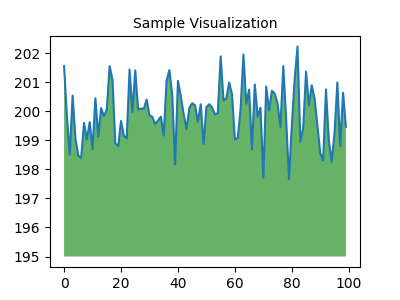

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Anda dapat mengimpor data sendiri ke notebook Colab dari akun Google Drive Anda, termasuk dari spreadsheet, GitHub, dan berbagai sumber lainnya. Untuk mempelajari lebih lanjut pengimporan data dan bagaimana Colab dapat digunakan untuk ilmu data, lihat link di bawah pada bagian <a href="#working-with-data">Bekerja dengan Data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Dengan Colab Anda dapat mengimpor set data gambar, melatih pengklasifikasi gambar pada gambar tersebut, dan mengevaluasi model, semuanya hanya dengan <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">beberapa baris kode</a>. Notebook Colab mengeksekusi kode pada server cloud Google. Itu artinya Anda dapat memanfaatkan kecanggihan hardware Google, termasuk <a href="#using-accelerated-hardware">GPU dan TPU</a>, terlepas dari mesin yang Anda gunakan. Yang Anda butuhkan hanyalah browser.

Colab digunakan secara luas di komunitas machine learning dengan berbagai penerapan meliputi:
- Memulai TensorFlow
- Mengembangkan dan melatih jaringan neural
- Bereksperimen dengan TPU
- Menyebarkan riset AI
- Membuat tutorial

Untuk melihat sampel notebook Colab yang menunjukkan penerapan machine learning, lihat <a href="#machine-learning-examples">contoh machine learning</a> di bawah.

<div class="markdown-google-sans">

## Referensi Lainnya

### Bekerja dengan Notebook di Colab

</div>

- [Ringkasan Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Panduan tentang Markdown](/notebooks/markdown_guide.ipynb)
- [Mengimpor library dan menginstal dependensi](/notebooks/snippets/importing_libraries.ipynb)
- [Menyimpan dan memuat notebook di GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulir interaktif](/notebooks/forms.ipynb)
- [Widget interaktif](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Bekerja dengan Data
</div>

- [Memuat data: Drive, Spreadsheet, dan Google Cloud Storage](/notebooks/io.ipynb)
- [Diagram: memvisualisasikan data](/notebooks/charts.ipynb)
- [Memulai BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Kursus Singkat Machine Learning

<div>

Berikut adalah beberapa notebook dari kursus Machine Learning online Google. Untuk info selengkapnya, buka <a href="https://developers.google.com/machine-learning/crash-course/">situs kursus lengkap</a>.
- [Pengantar Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regresi linear dengan tf.keras menggunakan data sintetis](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Menggunakan Hardware yang Diakselerasi
</div>

- [TensorFlow dengan GPU](/notebooks/gpu.ipynb)
- [TensorFlow dengan TPU](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Contoh bagus

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Gunakan Toolkit AI percakapan NeMo Nvidia untuk menukar suara dalam fragmen audio dengan suara yang dihasilkan komputer.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Melatih Kembali Pengklasifikasi Gambar</a>: Membangun model Keras di atas pengklasifikasi gambar yang telah terlatih untuk membedakan berbagai bunga.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Klasifikasi Teks</a>: Mengklasifikasikan ulasan film IMDB, baik sebagai <em>positif</em> ataupun <em>negatif</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transfer Gaya</a>: Menggunakan deep learning untuk mentransfer gaya antar-gambar.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Tanya Jawab Encoder Kalimat Universal Multibahasa</a>: Menggunakan model machine learning untuk menjawab pertanyaan dari set data SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Jenis Interpolasi Video</a>: Memprediksi apa yang terjadi dalam suatu video antara bingkai pertama dan terakhir.
